Resumo do Código
# **Este código tem como objetivo coletar dados sobre a qualidade do ar em São Paulo nos últimos dois meses, utilizando a API do OpenWeatherMap. Em seguida, os dados são processados e visualizados em gráficos para análise. O código é dividido nas seguintes seções:**

Logo no final do codigo tem uma explicação mais detalhada.

# **Importação de Bibliotecas**

In [ ]:
import requests
import datetime
import matplotlib.pyplot as plt
import pandas as pd


# Função para Coletar Dados

In [ ]:
def get_air_quality(api_key, lat, lon, start_date, end_date):
    url = "http://api.openweathermap.org/data/2.5/air_pollution/history"
    params = {
        'lat': lat,
        'lon': lon,
        'start': int(start_date.timestamp()),
        'end': int(end_date.timestamp()),
        'appid': api_key
    }
    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()
        return data['list']
    else:
        print(f"Erro ao buscar dados: {response.status_code}")
        return None


# Definição de Dados para Consulta

In [ ]:
api_key = "65c347df405eb83c68939ae45feba732"  # Substitua com sua chave de API
lat = -23.55052  # Latitude de São Paulo
lon = -46.633308  # Longitude de São Paulo

# Definir o período de tempo
end_date = datetime.datetime.now()  # Data atual
start_date = end_date - datetime.timedelta(days=60)  # Últimos 2 meses


# Coleta de Dados

In [ ]:
data = get_air_quality(api_key, lat, lon, start_date, end_date)


# Processamento e Estruturação dos Dados

In [ ]:
if data:
    # Listas para armazenar os dados
    dates = []
    pm2_5_values = []
    pm10_values = []
    co_values = []
    o3_values = []
    no2_values = []
    so2_values = []

    for entry in data:
        dt = datetime.datetime.fromtimestamp(entry['dt'])
        dates.append(dt)
        pm2_5_values.append(entry['components']['pm2_5'])
        pm10_values.append(entry['components']['pm10'])
        co_values.append(entry['components']['co'])
        o3_values.append(entry['components']['o3'])
        no2_values.append(entry['components']['no2'])
        so2_values.append(entry['components']['so2'])


# Criação de um DataFrame

In [ ]:
    # Criar um DataFrame para facilitar a manipulação e visualização
    df = pd.DataFrame({
        'Date': dates,
        'PM2.5': pm2_5_values,
        'PM10': pm10_values,
        'CO': co_values,
        'O3': o3_values,
        'NO2': no2_values,
        'SO2': so2_values
    })

    # Definir a coluna de datas como o índice
    df.set_index('Date', inplace=True)


# Plotagem dos Gráficos

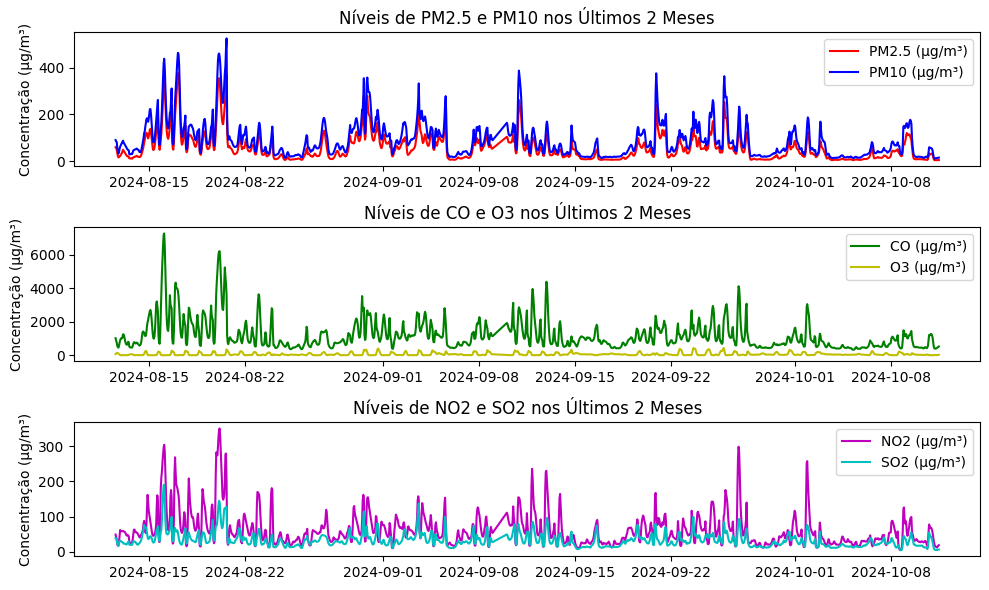

In [ ]:
plt.figure(figsize=(10, 6))

# PM2.5 e PM10
plt.subplot(3, 1, 1)
plt.plot(df.index, df['PM2.5'], label='PM2.5 (µg/m³)', color='r')
plt.plot(df.index, df['PM10'], label='PM10 (µg/m³)', color='b')
plt.title('Níveis de PM2.5 e PM10 nos Últimos 2 Meses')
plt.ylabel('Concentração (µg/m³)')
plt.legend()

# CO e O3
plt.subplot(3, 1, 2)
plt.plot(df.index, df['CO'], label='CO (µg/m³)', color='g')
plt.plot(df.index, df['O3'], label='O3 (µg/m³)', color='y')
plt.title('Níveis de CO e O3 nos Últimos 2 Meses')
plt.ylabel('Concentração (µg/m³)')
plt.legend()

# NO2 e SO2
plt.subplot(3, 1, 3)
plt.plot(df.index, df['NO2'], label='NO2 (µg/m³)', color='m')
plt.plot(df.index, df['SO2'], label='SO2 (µg/m³)', color='c')
plt.title('Níveis de NO2 e SO2 nos Últimos 2 Meses')
plt.ylabel('Concentração (µg/m³)')
plt.legend()

plt.tight_layout()
plt.show()


# **Poluentes e Seus Perigos:**

**PM2.5 (Partículas Inaláveis Finas):**

**Descrição**: PM2.5 refere-se a partículas com diâmetro menor que 2,5 micrômetros, muitas vezes originadas pela queima de combustíveis fósseis, como em veículos e indústrias. Essas partículas são pequenas o suficiente para penetrar profundamente nos pulmões e até entrar na corrente sanguínea.

**Perigos:** A exposição prolongada a altas concentrações de PM2.5 pode causar problemas respiratórios graves, doenças cardiovasculares, ataques cardíacos e até câncer. Crianças, idosos e pessoas com doenças pré-existentes são especialmente vulneráveis.

**Prevenção:** Evitar atividades físicas intensas ao ar livre em dias de alta poluição, usar máscaras adequadas (como N95) e utilizar purificadores de ar em ambientes fechados.


**PM10 (Partículas Inaláveis Grossas):**

**Descrição**: PM10 são partículas com diâmetro inferior a 10 micrômetros, geralmente provenientes de poeira de construção, pólen e cinzas. Embora maiores que o PM2.5, ainda podem ser inaladas e causar problemas de saúde.

**Perigos:** As PM10 podem irritar o nariz, garganta e pulmões, causando problemas respiratórios e agravar condições como asma e bronquite. A exposição crônica também pode aumentar o risco de doenças pulmonares.

**Prevenção**: Em ambientes com poeira elevada, usar máscaras, e, se possível, evitar áreas com tráfego intenso ou construção

**PM10 (Partículas Inaláveis Grossas):**

**Descrição**: PM10 são partículas com diâmetro inferior a 10 micrômetros, geralmente provenientes de poeira de construção, pólen e cinzas. Embora maiores que o PM2.5, ainda podem ser inaladas e causar problemas de saúde.

**Perigos:** As PM10 podem irritar o nariz, garganta e pulmões, causando problemas respiratórios e agravar condições como asma e bronquite. A exposição crônica também pode aumentar o risco de doenças pulmonares.

**Prevenção:** Em ambientes com poeira elevada, usar máscaras, e, se possível, evitar áreas com tráfego intenso ou construção

**(Ozônio):**

**Descrição:** O ozônio ao nível do solo (O3) é um poluente secundário formado pela reação de outros poluentes, como óxidos de nitrogênio (NOx) e compostos orgânicos voláteis (COVs), na presença de luz solar. Embora o ozônio na estratosfera seja benéfico, no nível do solo ele é um poluente nocivo.

**Perigos:** O ozônio pode causar irritação nos olhos, nariz e garganta, agravando doenças respiratórias como asma e bronquite. Exposições prolongadas podem danificar o tecido pulmonar.

**Prevenção:** Evitar exposição ao ar livre durante picos de ozônio, especialmente em dias ensolarados, quando os níveis são mais altos.

**NO2 (Dióxido de Nitrogênio):**

**Descrição:** O NO2 é emitido principalmente por veículos e plantas industriais, como resultado da combustão de combustíveis. É um dos principais contribuintes para a formação de ozônio ao nível do solo.

**Perigos:** O NO2 irrita o sistema respiratório e pode diminuir a função pulmonar, aumentando a suscetibilidade a infecções respiratórias. A exposição crônica pode contribuir para o desenvolvimento de doenças respiratórias graves.

**Prevenção:** Reduzir a exposição em áreas com tráfego intenso e garantir boa ventilação em casa, especialmente se houver fontes de combustão.

**SO2 (Dióxido de Enxofre):**

**Descrição:** O SO2 é produzido pela queima de combustíveis fósseis contendo enxofre, como carvão e petróleo. Indústrias e usinas de energia são grandes fontes desse poluente.

**Perigos:** O SO2 pode causar irritação nas vias aéreas, levando a tosse, aperto no peito e falta de ar. A exposição prolongada pode causar doenças respiratórias e agravar condições preexistentes como asma.

**Prevenção:** Reduzir o uso de combustíveis fósseis, principalmente em áreas com alta concentração de SO2. Melhorar a ventilação e evitar áreas de poluição industrial intensa.

# **Fontes de Informação:**

World Health Organization (WHO): Diretrizes sobre os limites de exposição a diferentes poluentes atmosféricos e seus efeitos à saúde.

Environmental Protection Agency (EPA): Fornece informações sobre os principais poluentes do ar e seus impactos em saúde pública e meio ambiente.

Agências nacionais de monitoramento do ar, como o Instituto Nacional de Pesquisas Espaciais (INPE) no Brasil, que disponibiliza dados sobre poluição e qualidade do ar em diversas cidades.

Essas fontes baseiam-se em estudos científicos rigorosos e pesquisas epidemiológicas que analisam os efeitos de curto e longo prazo dos poluentes atmosféricos em populações humanas. Os dados coletados por APIs de plataformas como OpenWeather se baseiam em monitoramentos de qualidade do ar em tempo real, o que permite um acompanhamento preciso dos níveis de poluição e dos riscos à saúde.
